In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("/content/sample_data/mission1_data.csv")

In [3]:
data.head(10)

,Gender,Parental Education Level,Lunch Type,Test Preparation Course,Study Time,Absences,Math Score,Reading Score,Writing Score
0,Male,High School,Standard,NaN,10,7,88,94,72
1,Male,High School,Standard,NaN,1,3,67,80,95
2,Male,Bachelor,Free/Reduced,NaN,1,6,84,100,76
3,Male,Associate,Free/Reduced,Completed,1,1,60,92,64
4,Female,Associate,Free/Reduced,NaN,2,0,72,92,99
5,Male,Master,Standard,NaN,7,2,84,75,61
6,Female,Bachelor,Standard,NaN,4,1,86,64,93
7,Male,Bachelor,Standard,Completed,7,3,98,96,68
8,Female,Some College,Standard,Completed,6,2,66,94,81
9,Female,Some College,Standard,Completed,6,2,66,94,81


In [4]:
data['exam_scores'] = data['Math Score'] + data['Reading Score'] + data['Writing Score']
data= data.drop(['Math Score', 'Reading Score', 'Writing Score'], axis=1)
data['Test Preparation Course'].value_counts()

,count
Test Preparation Course,
Completed,574


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Gender                    1000 non-null   object
 1   Parental Education Level  1000 non-null   object
 2   Lunch Type                1000 non-null   object
 3   Test Preparation Course   574 non-null    object
 4   Study Time                1000 non-null   int64 
 5   Absences                  1000 non-null   int64 
 6   exam_scores               1000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 54.8+ KB


In [6]:
data['Test Preparation Course'].fillna("Not Completed", inplace=True)

<ipython-input-6-cd69be179c18>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Test Preparation Course'].fillna("Not Completed", inplace=True)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Gender                    1000 non-null   object
 1   Parental Education Level  1000 non-null   object
 2   Lunch Type                1000 non-null   object
 3   Test Preparation Course   1000 non-null   object
 4   Study Time                1000 non-null   int64 
 5   Absences                  1000 non-null   int64 
 6   exam_scores               1000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 54.8+ KB


In [8]:
data.head()

,Gender,Parental Education Level,Lunch Type,Test Preparation Course,Study Time,Absences,exam_scores
0,Male,High School,Standard,Not Completed,10,7,254
1,Male,High School,Standard,Not Completed,1,3,242
2,Male,Bachelor,Free/Reduced,Not Completed,1,6,260
3,Male,Associate,Free/Reduced,Completed,1,1,216
4,Female,Associate,Free/Reduced,Not Completed,2,0,263


In [9]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [10]:
import joblib

le = {}
for col in data.columns:
  if data[col].dtype == 'object':
    le[col] = LabelEncoder()
    data[col] = le[col].fit_transform(data[col])

# data['Gender'] = le.fit_transform(data['Gender'])
# data['Lunch Type'] = le.fit_transform(data['Lunch Type'])
# data['Test Preparation Course'] = le.fit_transform(data['Test Preparation Course'])
# data['Parental Education Level'] = le.fit_transform(data['Parental Education Level'])
joblib.dump(le, 'En.pkl')
le

{'Gender': LabelEncoder(),
 'Parental Education Level': LabelEncoder(),
 'Lunch Type': LabelEncoder(),
 'Test Preparation Course': LabelEncoder()}

In [11]:
# l = ['Gender', 'Lunch Type','Test Preparation Course', 'Parental Education Level' ]
# for i in l:
#   data[i] = le.fit_transform(data[i])

In [12]:
data.head(10)

,Gender,Parental Education Level,Lunch Type,Test Preparation Course,Study Time,Absences,exam_scores
0,1,2,1,1,10,7,254
1,1,2,1,1,1,3,242
2,1,1,0,1,1,6,260
3,1,0,0,0,1,1,216
4,0,0,0,1,2,0,263
5,1,3,1,1,7,2,220
6,0,1,1,1,4,1,243
7,1,1,1,0,7,3,262
8,0,4,1,0,6,2,241
9,0,4,1,0,6,2,241


In [13]:
data['Parental Education Level'].value_counts()

,count
Parental Education Level,
2,277
1,199
0,185
3,177
4,162


In [14]:
data.corr()

,Gender,Parental Education Level,Lunch Type,Test Preparation Course,Study Time,Absences,exam_scores
Gender,1.000000,-0.190818,0.147566,0.126687,0.096862,0.143581,0.071113
Parental Education Level,-0.190818,1.000000,0.005212,-0.112870,-0.075644,-0.066375,0.002267
Lunch Type,0.147566,0.005212,1.000000,0.114912,0.084201,0.081553,0.130039
Test Preparation Course,0.126687,-0.112870,0.114912,1.000000,-0.045880,0.095818,0.012206
Study Time,0.096862,-0.075644,0.084201,-0.045880,1.000000,0.140274,-0.113362
Absences,0.143581,-0.066375,0.081553,0.095818,0.140274,1.000000,0.017189
exam_scores,0.071113,0.002267,0.130039,0.012206,-0.113362,0.017189,1.000000


In [15]:
data.head()

,Gender,Parental Education Level,Lunch Type,Test Preparation Course,Study Time,Absences,exam_scores
0,1,2,1,1,10,7,254
1,1,2,1,1,1,3,242
2,1,1,0,1,1,6,260
3,1,0,0,0,1,1,216
4,0,0,0,1,2,0,263


In [16]:
data.describe()

,Gender,Parental Education Level,Lunch Type,Test Preparation Course,Study Time,Absences,exam_scores
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.568000,1.932000,0.492000,0.426000,5.343000,4.629000,239.743000
std,0.495602,1.327078,0.500186,0.494741,3.048055,3.104996,20.136495
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,193.000000
25%,0.000000,1.000000,0.000000,0.000000,3.000000,2.000000,222.000000
50%,1.000000,2.000000,0.000000,0.000000,5.000000,4.000000,242.000000
75%,1.000000,3.000000,1.000000,1.000000,8.000000,7.000000,256.000000
max,1.000000,4.000000,1.000000,1.000000,10.000000,10.000000,284.000000


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

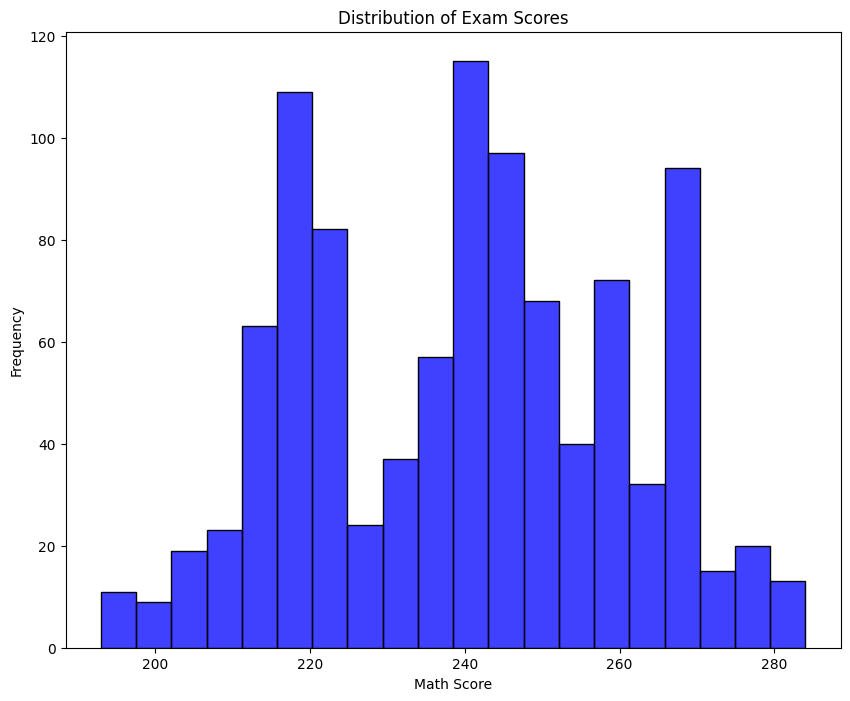

In [18]:
plt.figure(figsize=(10, 8))
sns.histplot(data['exam_scores'], kde=False, bins=20, color='blue')
plt.title('Distribution of Exam Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

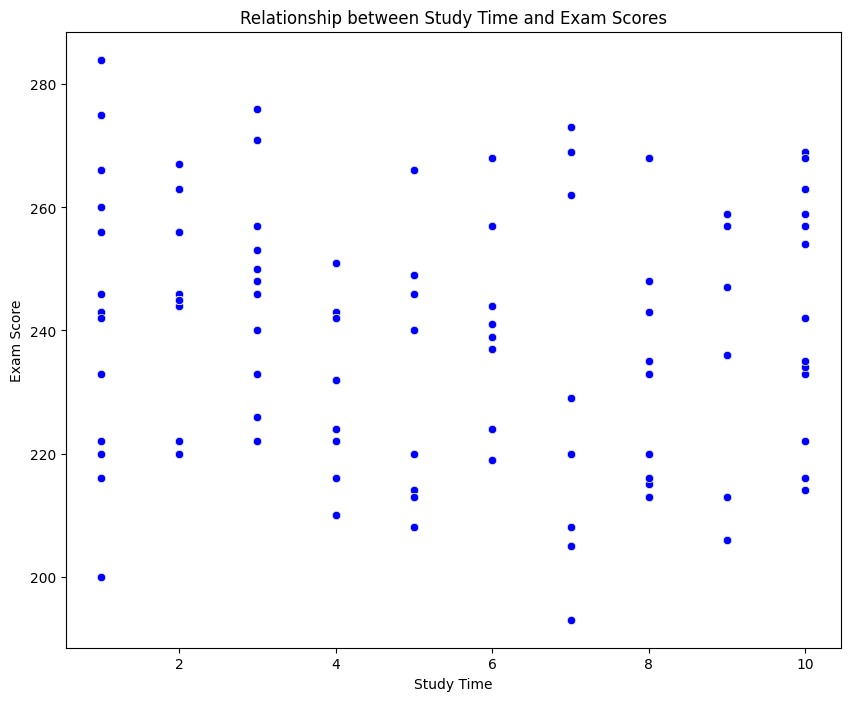

In [19]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Study Time', y='exam_scores', data=data, color='blue')
plt.title('Relationship between Study Time and Exam Scores')
plt.xlabel('Study Time')
plt.ylabel('Exam Score')
plt.show()

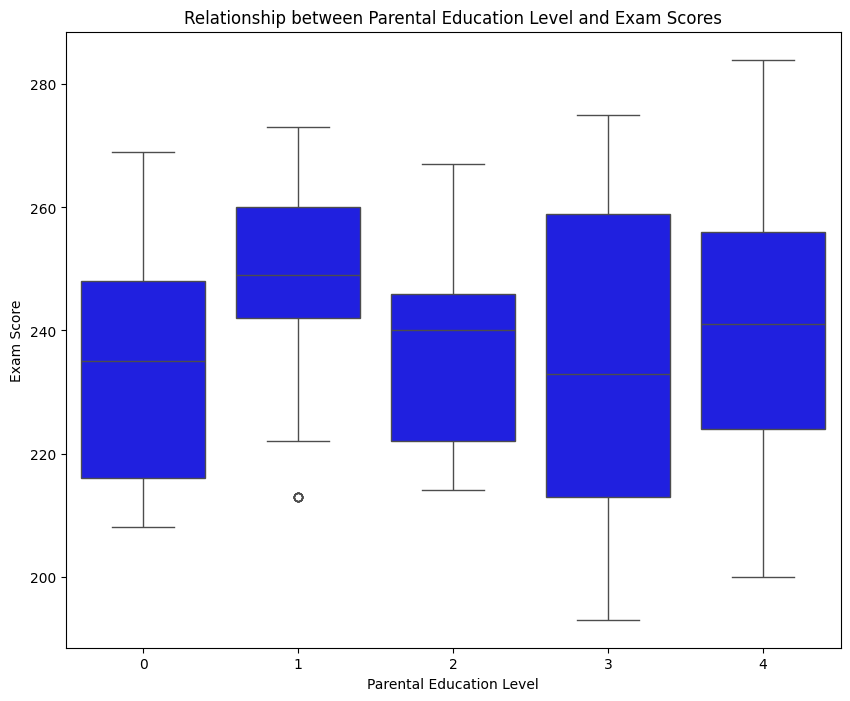

In [20]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Parental Education Level', y='exam_scores', data=data, color='blue')
plt.title('Relationship between Parental Education Level and Exam Scores')
plt.xlabel('Parental Education Level')
plt.ylabel('Exam Score')
plt.show()

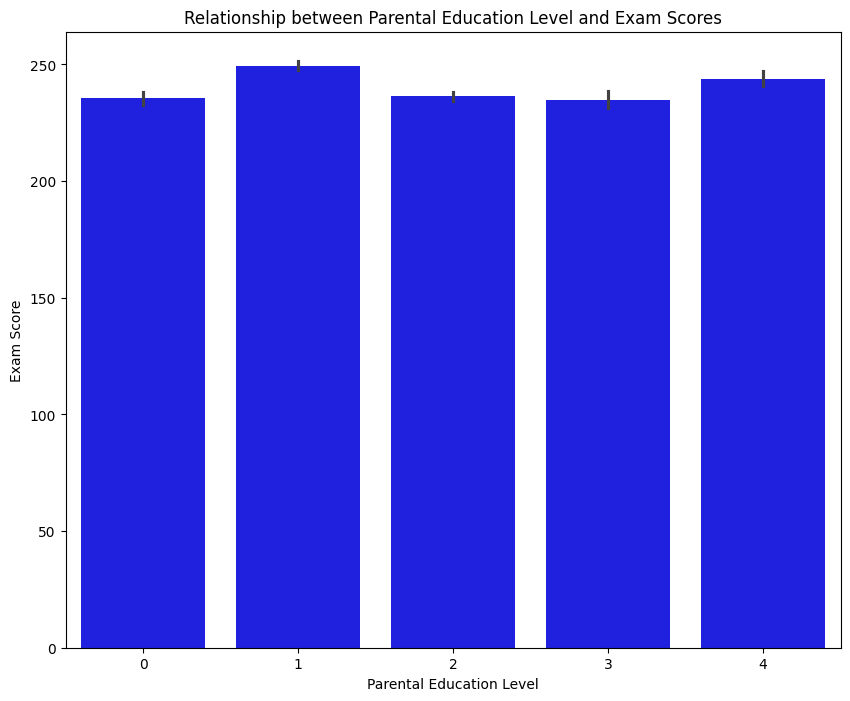

In [21]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Parental Education Level', y='exam_scores', data=data, color='blue')
plt.title('Relationship between Parental Education Level and Exam Scores')
plt.xlabel('Parental Education Level')
plt.ylabel('Exam Score')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x = data.drop('exam_scores', axis=1)
y = data['exam_scores']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
scaling_cols = ["Study Time", "Absences"]
x_train[scaling_cols] = scaler.fit_transform(x_train[scaling_cols])

# Also scale the test data using the same scaler
x_test[scaling_cols] = scaler.fit_transform(x_test[scaling_cols])


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [25]:
lr = LinearRegression()
lr.fit(x_train, y_train)
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
rf = RandomForestRegressor()
rf.fit(x_train, y_train)


RandomForestRegressor()

In [26]:
joblib.dump(scaler, 's.pkl')
joblib.dump(rf, 'rf_model.pkl')

['rf_model.pkl']

In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [28]:
y_pred_lr = lr.predict(x_test)
y_pred_dt = dt.predict(x_test)
y_pred_rf = rf.predict(x_test)

In [29]:
print("Linear regssion MSE: ", mean_squared_error(y_test, y_pred_lr))
print("Descion Tree MSE: ", mean_squared_error(y_test, y_pred_dt))
print("Random Forest MSE: ", mean_squared_error(y_test, y_pred_rf))


Linear regssion MSE:  370.86880240245824
Descion Tree MSE:  3.0404222222222232
Random Forest MSE:  3.2105303704290487


In [30]:
print("Linear Regression Accuracy: ", r2_score(y_test, y_pred_lr))
print("Decision Tree Accuracy: ", r2_score(y_test, y_pred_dt))
print("Random Forest Accuracy: ", r2_score(y_test, y_pred_rf))

Linear Regression Accuracy:  0.007341307383233797
Decision Tree Accuracy:  0.9918620775633781
Random Forest Accuracy:  0.9914067701044907


In [31]:
print("Mean Absolute Error Linear regression:", mean_absolute_error(y_test, y_pred_lr))
print("Mean Absolute Error Descion tree:", mean_absolute_error(y_test, y_pred_dt))
print("Mean Absolute Error random forest:", mean_absolute_error(y_test, y_pred_rf))


Mean Absolute Error Linear regression: 16.026235924057172
Mean Absolute Error Descion tree: 0.23433333333333337
Mean Absolute Error random forest: 0.2899217451946336


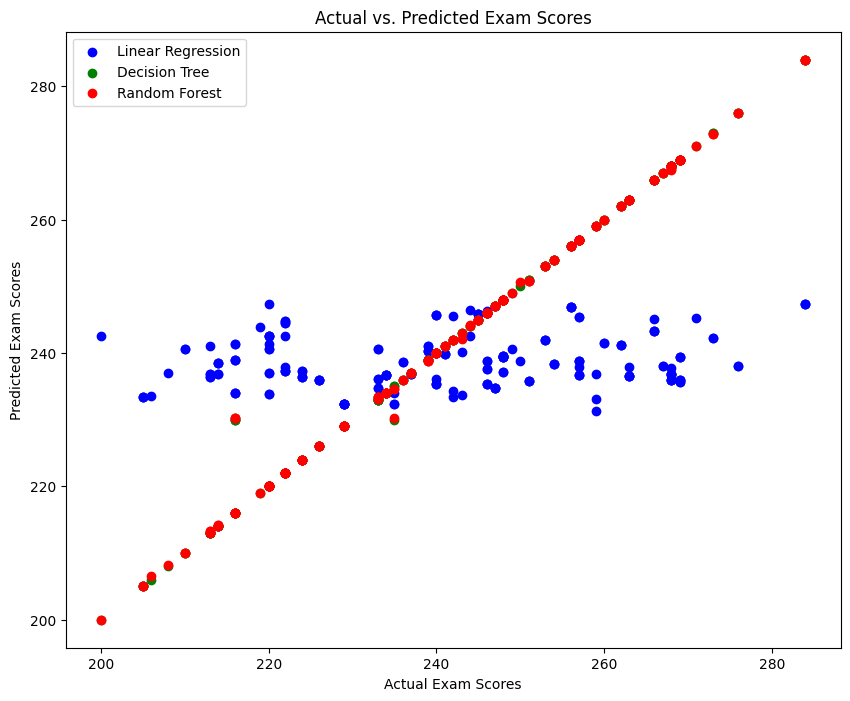

In [32]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_dt, color='green', label='Decision Tree')
plt.scatter(y_test, y_pred_rf, color='red', label='Random Forest')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Actual vs. Predicted Exam Scores')
plt.legend()
plt.show()

In [33]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [34]:
# Liner regression has no hyper pramters
# using gridsearchcv
dt_param = {'max_depth': [3, 5, 10, None], 'max_leaf_nodes': [2,5,7]}
grid_model = GridSearchCV(DecisionTreeRegressor(), dt_param, cv=5)
grid_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 10, None],
                         'max_leaf_nodes': [2, 5, 7]})

In [35]:
print("best paramters is: ", grid_model.best_params_)

best paramters is:  {'max_depth': 5, 'max_leaf_nodes': 7}


In [36]:
y_predict_grid = grid_model.best_estimator_.predict(x_test)
print("Mean Absoulte error for Grisearch is:", mean_absolute_error(y_test,y_predict_grid ))

Mean Absoulte error for Grisearch is: 15.198543248133


In [37]:
r2_score(y_test, y_predict_grid)

0.12965268034269672

In [38]:
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5,10]}
random_model = RandomizedSearchCV(RandomForestRegressor(),rf_params, scoring = 'neg_mean_absolute_error', random_state=42)
random_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [3, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='neg_mean_absolute_error')

In [39]:
print('Randomized bes paramters is:', random_model.best_params_)

Randomized bes paramters is: {'n_estimators': 50, 'max_depth': 10}


In [40]:
y_predict_rf = random_model.best_estimator_.predict(x_test)
print("Mean Absoulte error for Randomized is:", mean_absolute_error(y_test,y_predict_rf ))

Mean Absoulte error for Randomized is: 0.4244924294740272


In [41]:
pip show scikit-learn

Name: scikit-learn
Version: 1.6.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License
         
         Copyright (c) 2007-2024 The scikit-learn developers.
         All rights reserved.
         
         Redistribution and use in source and binary forms, with or without
         modification, are permitted provided that the following conditions are met:
         
         * Redistributions of source code must retain the above copyright notice, this
           list of conditions and the following disclaimer.
         
         * Redistributions in binary form must reproduce the above copyright notice,
           this list of conditions and the following disclaimer in the documentation
           and/or other materials provided with the distribution.
         
         * Neither the name of the copyright holder nor the names of its
           contributors may be used to endorse 